In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt
import datetime
import types
from botocore.client import Config
import ibm_boto3

In [3]:
# The code was removed by Watson Studio for sharing.

,Company,Date,Closing (c),High (c),Low (c),Volume,# Deals,Value (R),Move (%),DY,EY,PE
0,MTN,2020-02-17,8820,8879,8725,2350702,3130,207 277 923,0.0112,0.0000,0.0000,0.0000
1,MTN,2020-02-14,8722,8873,8696,3895872,5710,340 272 727,-0.0072,4.7695,3.6344,27.5141
2,MTN,2020-02-13,8785,8978,8712,4837848,8169,425 234 479,-0.0028,4.7353,3.6084,27.7129
3,MTN,2020-02-12,8810,8961,8330,7969935,14546,701 183 321,0.06,4.7219,3.5981,27.7917
4,MTN,2020-02-11,8311,8385,8225,3576616,5561,297 254 218,0.0034,5.0054,3.8142,26.2176


In [4]:
s = []
for n in df['Value (R)'][:]:
    s.append(str(n))
a = []
for n in s:
    a.append(float(''.join(n.split())))
df['Value'] = a
df.drop(["Value (R)"], axis=1, inplace=True)
df.dtypes

Company                object
Date           datetime64[ns]
Closing (c)             int64
High (c)                int64
Low (c)                 int64
Volume                  int64
# Deals                 int64
Move (%)               object
DY                    float64
EY                    float64
PE                    float64
Value                 float64
dtype: object

In [5]:
df.rename(columns={"Move (%)":"Move_Perc"}, inplace=True)
df.head()

,Company,Date,Closing (c),High (c),Low (c),Volume,# Deals,Move_Perc,DY,EY,PE,Value
0,MTN,2020-02-17,8820,8879,8725,2350702,3130,0.0112,0.0000,0.0000,0.0000,207277923.0
1,MTN,2020-02-14,8722,8873,8696,3895872,5710,-0.0072,4.7695,3.6344,27.5141,340272727.0
2,MTN,2020-02-13,8785,8978,8712,4837848,8169,-0.0028,4.7353,3.6084,27.7129,425234479.0
3,MTN,2020-02-12,8810,8961,8330,7969935,14546,0.06,4.7219,3.5981,27.7917,701183321.0
4,MTN,2020-02-11,8311,8385,8225,3576616,5561,0.0034,5.0054,3.8142,26.2176,297254218.0


In [6]:
df["Move_Perc"] = np.where((df.Move_Perc == '...'),0,df.Move_Perc)
s = []
for n in df["Move_Perc"][:]:
    s.append(str(n))
a = []
for n in s:
    a.append(float(''.join(n.split())))
df['Move_Percentage'] = a
df.drop(["Move_Perc"], axis=1, inplace=True)
df.dtypes

Company                    object
Date               datetime64[ns]
Closing (c)                 int64
High (c)                    int64
Low (c)                     int64
Volume                      int64
# Deals                     int64
DY                        float64
EY                        float64
PE                        float64
Value                     float64
Move_Percentage           float64
dtype: object

In [310]:
df1 = df.pivot(index="Date", columns="Company", values="Closing (c)").pct_change().apply(lambda x: np.log(1+x))
df1.drop(['BATS', 'OLD MUTUAL'], axis=1, inplace=True)
df1.sort_index(ascending=False, inplace=True)

In [312]:
df1.reset_index(0)
df1.drop(df1.index[5287:6801], inplace=True)
df1.tail()

Company,DISCOVERY,HARMONY,MTN,SAPPI,SASOL
Date,,,,,
1999-10-28,0.006006,0.079625,0.026787,-0.001840,0.007117
1999-10-27,0.000000,-0.006771,0.004535,-0.014599,0.000000
1999-10-26,-0.017911,-0.064032,0.000000,-0.003617,-0.023530
1999-10-25,0.017911,-0.002528,-0.031322,0.000000,0.014052
1999-10-22,0.049393,-0.035962,0.013304,-0.003604,0.027497


In [314]:
cov = df1.cov()*1000
cov

Company,DISCOVERY,HARMONY,MTN,SAPPI,SASOL
Company,,,,,
DISCOVERY,0.312752,-0.009198,0.106406,0.061019,0.072326
HARMONY,-0.009198,1.033483,0.006318,0.079078,0.097063
MTN,0.106406,0.006318,0.579792,0.102087,0.140408
SAPPI,0.061019,0.079078,0.102087,0.627402,0.162900
SASOL,0.072326,0.097063,0.140408,0.162900,0.445132


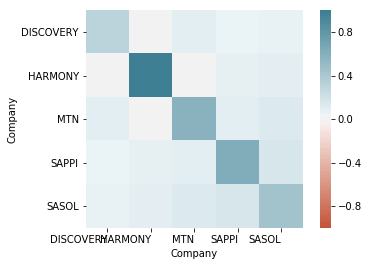

In [315]:
import seaborn as sns

ax = sns.heatmap(
    cov, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=0,
    horizontalalignment='right'
);

In [316]:
corr = df1.corr()
corr

Company,DISCOVERY,HARMONY,MTN,SAPPI,SASOL
Company,,,,,
DISCOVERY,1.000000,-0.016179,0.249880,0.137750,0.193843
HARMONY,-0.016179,1.000000,0.008162,0.098204,0.143106
MTN,0.249880,0.008162,1.000000,0.169263,0.276382
SAPPI,0.137750,0.098204,0.169263,1.000000,0.308250
SASOL,0.193843,0.143106,0.276382,0.308250,1.000000


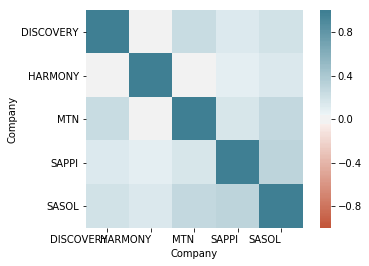

In [317]:
import seaborn as sns

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=0,
    horizontalalignment='right'
);